# 폐 영역분할

다음의 2019 대한의료인공지능학회 Summer School에서 진행한 AI hands-on의 자료에서 코드르 가져와서 수정함.

https://github.com/mi2rl/ai_handson/blob/master/KoSAIM_Summer_School_2019_Handson_03_Segmentation.ipynb


## 폐 데이터 다운로드

다음에서 다운받은 데이터

https://www.kaggle.com/nikhilpandey360/lung-segmentation-from-chest-x-ray-dataset

In [1]:
!rm -rf Lung_Segmentation.zip
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/Lung_Segmentation.zip

--2022-01-03 07:57:18--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/Lung_Segmentation.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/Lung_Segmentation.zip [following]
--2022-01-03 07:57:18--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/Lung_Segmentation.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37648324 (36M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segmentation.z 100%[===================>]  35.90M  --.-KB/s    in 0.1s    

2022-01-03 07:57:18 (309 MB/s) - ‘Lu

In [2]:
!rm -rf Lung_Segmentation
!unzip Lung_Segmentation.zip

Archive:  Lung_Segmentation.zip
   creating: Lung_Segmentation/
   creating: Lung_Segmentation/image/
  inflating: Lung_Segmentation/image/CHNCXR_0001_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0002_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0003_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0004_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0005_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0006_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0007_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0008_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0009_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0010_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0011_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0012_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0013_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0014_0.png  
  inflating: Lung_Segmentation/image/CHNCXR_0015_0.png  
  inflating: Lung_Segmentation/image/CHNCXR

## 풀린 데이터 파일 구조

```
Lung_segmentaiton/
  image/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
  label/
    CHNCXR_0001_0.png
    CHNCXR_0002_0.png
    ...
```

## 파일 보기

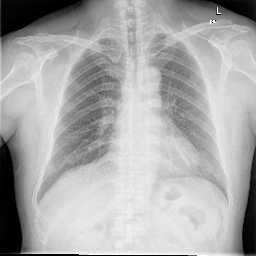

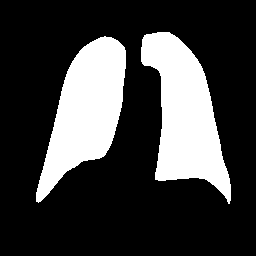

In [3]:
from IPython.display import Image, display

display(Image('./Lung_Segmentation/image/CHNCXR_0001_0.png'))
display(Image('./Lung_Segmentation/label/CHNCXR_0001_0.png'))


## 데이터 로딩

In [6]:
import numpy as np
import os

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "Lung_Segmentation"

files = os.listdir(os.path.join(data_path, 'image'))
# files = ['CHNCXR_0402_1.png', 'CHNCXR_0461_1.png', 'CHNCXR_0422_1.png', ... ]    


raw_x = []
raw_y = []
for file_name in files:
    # file_name = "CHNCXR_0402_1"

    # input_file = "./Lung_Segmentation/image/CHNCXR_0402_1.png"
    input_file = os.path.join(data_path, 'image', file_name)
    # output_file = "./Lung_Segmentation/label/CHNCXR_0402_1.png"
    output_file = os.path.join(data_path, 'label', file_name)
    
    image = imread(input_file)[:,:,:IMG_CHANNELS]
    # image.shape = (256, 256, 3)

    label = imread(output_file)
    # label.shape = (256, 256)

    label = np.expand_dims(label, axis=-1)
    # label.shape = (256, 256, 1)

    raw_x.append(image)
    raw_y.append(label)

raw_x = np.array(raw_x)
raw_y = np.array(raw_y)

## 원시 데이터 보기

In [7]:
print(raw_x[0])
print(raw_y[0])

[[[ 75  75  75]
  [ 37  37  37]
  [ 28  28  28]
  ...
  [ 46  46  46]
  [ 54  54  54]
  [ 62  62  62]]

 [[ 73  73  73]
  [ 35  35  35]
  [ 24  24  24]
  ...
  [ 45  45  45]
  [ 50  50  50]
  [ 53  53  53]]

 [[ 72  72  72]
  [ 32  32  32]
  [ 20  20  20]
  ...
  [ 42  42  42]
  [ 45  45  45]
  [ 50  50  50]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 56  56  56]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 70  70  70]
  [ 71  71  71]
  [ 79  79  79]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [109 109 109]
  [111 111 111]
  [112 112 112]]]
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


## 데이터 정규화

In [ ]:
x = raw_x.astype('float32') / 255.
y = raw_y.astype('float32')

## 데이터 나누기

In [ ]:
split_index = int(x_all.shape[0]*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(452, 256, 256, 3)
(452, 256, 256, 1)
(114, 256, 256, 3)
(114, 256, 256, 1)


train


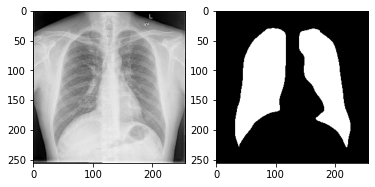

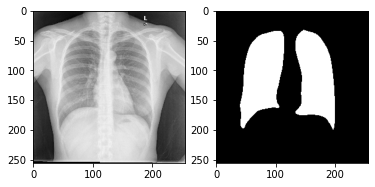

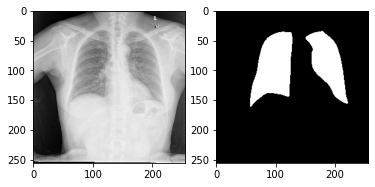

test


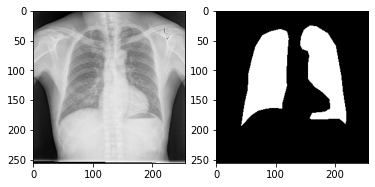

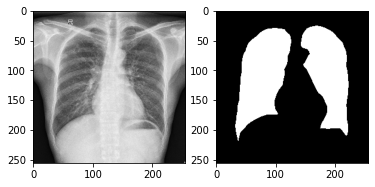

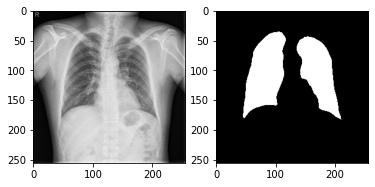

In [11]:
import matplotlib.pyplot as plt

def plotTrainData(x, y, set_type):
    print(set_type)  
    for i in range(3):
        ix = np.random.randint(0, len(x))
        plt.subplot(1,2,1)
        plt.imshow(x[ix])
        
        plt.subplot(1,2,2)
        plt.imshow(np.squeeze(y[ix]), 'gray') # np.squeeze()는 (256,26,1)을 (256,256)으로 변환
        plt.show()
        
plotTrainData(train_x, train_y, 'train')
plotTrainData(test_x, test_y, 'test')

## U-Net 모델 정의

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    
    up = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up, conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up, conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up, conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

## 모델 컴파일과 학습

In [ ]:
# 모델 생성
model = unet()

# 모델 컴파일
model.compile(loss="mse", optimizer="SGD", metrics=['accuracy'])

# 학습
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=20, batch_size=8, verbose=1)


Epoch 1/20
46/46 [==============================] - 6s 106ms/step - loss: 0.2113 - accuracy: 0.6930 - val_loss: 0.2629 - val_accuracy: 0.2743
Epoch 2/20
46/46 [==============================] - 4s 97ms/step - loss: 0.1679 - accuracy: 0.7777 - val_loss: 0.2873 - val_accuracy: 0.2584
Epoch 3/20
46/46 [==============================] - 4s 97ms/step - loss: 0.1460 - accuracy: 0.8133 - val_loss: 0.3161 - val_accuracy: 0.2636
Epoch 4/20
46/46 [==============================] - 4s 97ms/step - loss: 0.1259 - accuracy: 0.8435 - val_loss: 0.3243 - val_accuracy: 0.3232
Epoch 5/20
46/46 [==============================] - 4s 97ms/step - loss: 0.1035 - accuracy: 0.8766 - val_loss: 0.3207 - val_accuracy: 0.4480
Epoch 6/20
46/46 [==============================] - 4s 97ms/step - loss: 0.0833 - accuracy: 0.9050 - val_loss: 0.2662 - val_accuracy: 0.6395
Epoch 7/20
46/46 [==============================] - 4s 97ms/step - loss: 0.0713 - accuracy: 0.9198 - val_loss: 0.2244 - val_accuracy: 0.6899
Epoch 8/20
4

## 학습시 로스와 정확도 보기

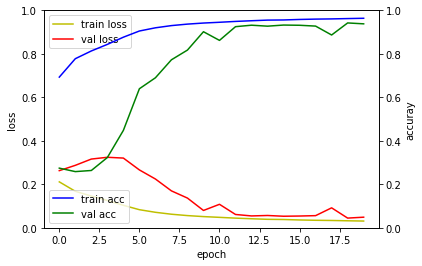

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 테스트 결과 보기

In [ ]:
import matplotlib.pyplot as plt

def plotPredictions(model, train_x, train_y, test_x, test_y):

    ix = np.random.randint(0, len(train_x))

    input_ = train_x[ix:ix+1]
    mask_ = train_y[ix:ix+1]

    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_train")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("Y_train")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')
    plt.show()

    ix = np.random.randint(0, len(test_x))
    input_ = test_x[ix:ix+1]
    mask_ = test_y[ix:ix+1]
    preds_test = model.predict(input_)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)
    
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title("X_test")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,3,2)
    plt.title("Y_test")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,3,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,0], 'gray')
    plt.show()

1/1 [==============================] - 0s 24ms/step - loss: 0.0255 - accuracy: 0.9664


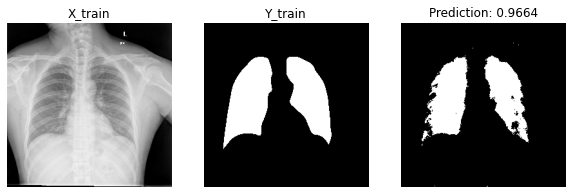

1/1 [==============================] - 0s 20ms/step - loss: 0.0636 - accuracy: 0.9189


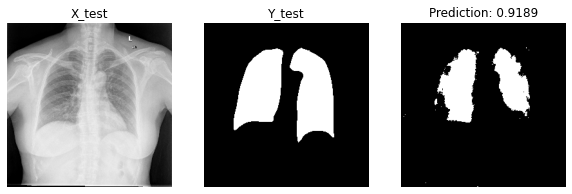

In [ ]:
plotPredictions(model, train_x, train_y, test_x, test_y)

Epoch 1/200
46/46 [==============================] - 4s 91ms/step - loss: 0.0318 - accuracy: 0.9615 - val_loss: 0.1401 - val_accuracy: 0.8179
Epoch 2/200
46/46 [==============================] - 4s 78ms/step - loss: 0.0291 - accuracy: 0.9649 - val_loss: 0.0327 - val_accuracy: 0.9591
Epoch 3/200
46/46 [==============================] - 3s 71ms/step - loss: 0.0281 - accuracy: 0.9660 - val_loss: 0.0386 - val_accuracy: 0.9503
Epoch 4/200
46/46 [==============================] - 3s 72ms/step - loss: 0.0272 - accuracy: 0.9671 - val_loss: 0.0295 - val_accuracy: 0.9641
Epoch 5/200
46/46 [==============================] - 3s 65ms/step - loss: 0.0266 - accuracy: 0.9678 - val_loss: 0.0298 - val_accuracy: 0.9638
Epoch 6/200
46/46 [==============================] - 3s 66ms/step - loss: 0.0260 - accuracy: 0.9685 - val_loss: 0.0380 - val_accuracy: 0.9529
Epoch 7/200
46/46 [==============================] - 3s 63ms/step - loss: 0.0253 - accuracy: 0.9693 - val_loss: 0.0306 - val_accuracy: 0.9630
Epoch 